# Creating a multiple regression model 

In [39]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [13]:
brfss=pd.read_hdf("/home/edremit/Desktop/Datasets/brfss.hdf5")
gss=pd.read_hdf("/home/edremit/Desktop/Datasets/gss.hdf5")

In [15]:
results=smf.ols('realinc ~ educ', data=gss).fit()
results.params

Intercept   -11539.147837
educ          3586.523659
dtype: float64

### Adding age

In [16]:
results=smf.ols('realinc ~ educ + age', data=gss).fit()
results.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

In [17]:
grouped= gss.groupby('age')

## Visualizing regression results

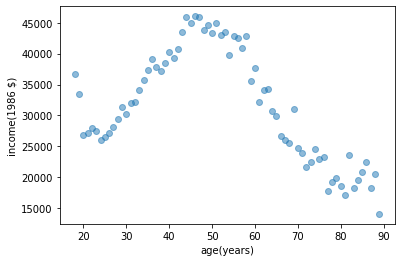

In [32]:
mean_income =grouped['realinc'].mean()
plt.plot(mean_income,'o',alpha=0.5)
plt.xlabel("age(years)")
plt.ylabel("income(1986 $)")
plt.show()

### Add a quadratic term


In [35]:
gss['age2']=gss['age']**2
gss['educ2']=gss['educ']**2

In [36]:
model=smf.ols('realinc ~ educ +educ2 + age +age2', data=gss)
results=model.fit()
results.params

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64

### Generating predictions

In [53]:
df=pd.DataFrame()
df['age']=np.linspace(18,85)
df['age2']=df['age']**2
df['educ']=12
df['educ2']=df['educ']**2
pred12=results.predict(df)

### Plotting predictions

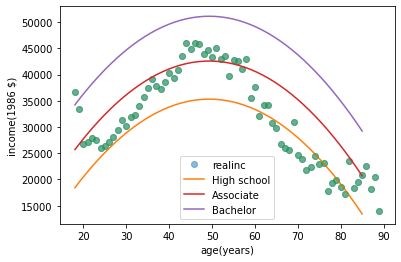

In [59]:
mean_income =grouped['realinc'].mean()
plt.plot(mean_income,'o',alpha=0.5, label='realinc')
plt.xlabel("age(years)")
plt.ylabel("income(1986 $)")

plt.plot(df['age'],pred12,label='High school')
plt.plot(mean_income, 'o', alpha=0.4)
plt.xlabel("age(years)")
plt.ylabel("income(1986 $)")

df['educ']=14
df['educ2']=df['educ']**2
pred14=results.predict(df)
plt.plot(df['age'],pred14,label='Associate')

df['educ']=16
df['educ2']=df['educ']**2
pred16=results.predict(df)
plt.plot(df['age'],pred16,label='Bachelor')
plt.legend()